In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("17mart-mmm.csv")

In [3]:
df.head()

,DATE,revenue,Facebook_I,Facebook_C,Facebook_S,Instagram_I,Instagram_C,Instagram_S,Messenger_I,Messenger_C,...,G_Video_Click,G_Display_S,G_Display_I,G_Display_C,G_PMAX_S,G_PMAX_I,G_PMAX_C,Event,Rakip Firma Satışları,G_Organic_User
0,2021-07-18,48908,129640,8049,3337,3832,1700,3832,4337,9,...,3080,1736,508304,10928,196,29489,577,0,12716,1668
1,2021-07-25,152142,185524,11746,5805,7833,4078,7833,6527,10,...,1455,1266,398970,8140,201,32615,932,0,39557,862
2,2021-08-01,216257,297082,23625,8285,11200,6452,11200,6304,17,...,4420,1822,604802,10791,476,57632,2381,0,56227,2674
3,2021-08-08,257988,304611,21276,8702,14459,6305,14459,7951,24,...,4953,3397,658136,8006,893,214475,3043,0,67077,2253
4,2021-08-15,286495,253223,19208,9196,16113,5574,16113,9156,26,...,5700,3068,645475,7758,969,129967,3423,0,74489,2304


C:\Users\HARUN\AppData\Local\Temp\ipykernel_4464\3199255953.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


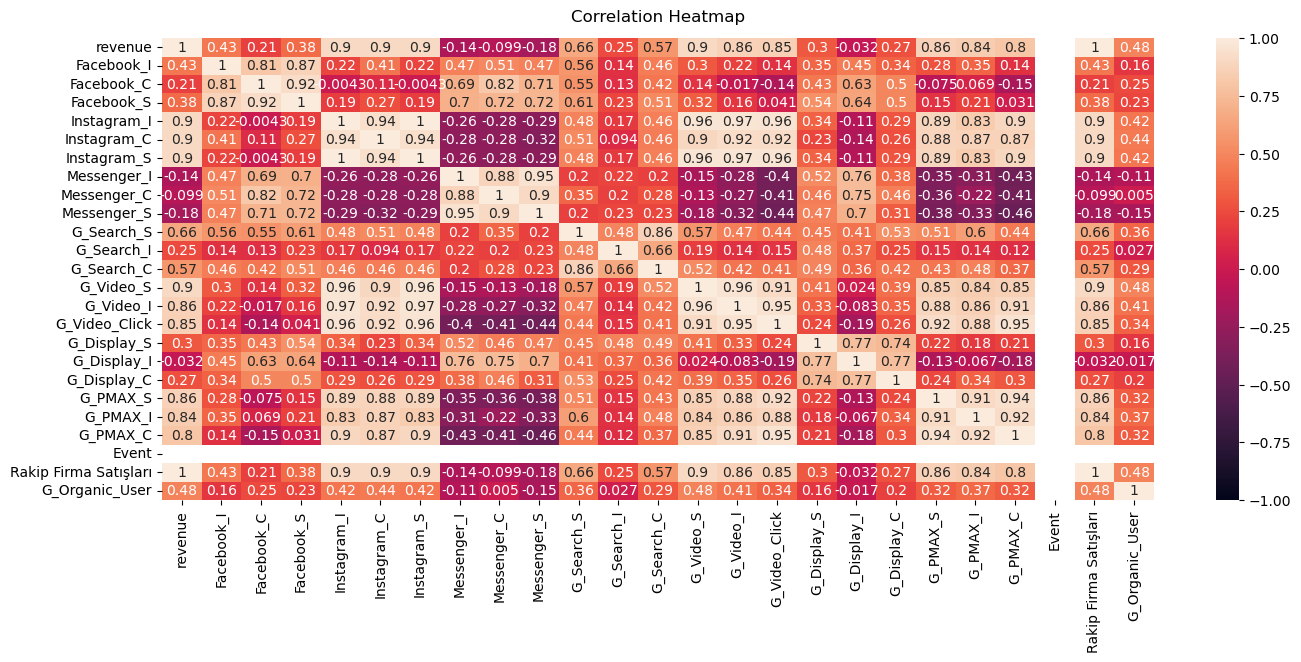

In [4]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [62]:
import pingouin as pg
an_df = pg.pairwise_corr(df, method='pearson')

In [57]:
spending_vars = [i for i in df.columns if "_S" in i]

In [58]:
spending_vars

['Facebook_S',
 'Instagram_S',
 'Messenger_S',
 'G_Search_S',
 'G_Search_I',
 'G_Search_C',
 'G_Video_S',
 'G_Display_S',
 'G_PMAX_S']

In [139]:
cor_df = an_df[(an_df["X"]=="revenue") & (an_df["Y"].str.endswith("_S"))].reset_index(drop=True)

In [140]:
cor_df

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,revenue,Facebook_S,pearson,two-sided,81,0.375782,"[0.17, 0.55]",5.460327e-04,49.115,0.939293
1,revenue,Instagram_S,pearson,two-sided,81,0.904977,"[0.86, 0.94]",4.718332e-31,5.501e+27,1.000000
2,revenue,Messenger_S,pearson,two-sided,81,-0.177604,"[-0.38, 0.04]",1.126876e-01,0.478,0.357193
3,revenue,G_Search_S,pearson,two-sided,81,0.655724,"[0.51, 0.76]",3.062067e-11,3.555e+08,1.000000
4,revenue,G_Video_S,pearson,two-sided,81,0.900925,"[0.85, 0.94]",2.267104e-30,1.196e+27,1.000000
5,revenue,G_Display_S,pearson,two-sided,81,0.302260,"[0.09, 0.49]",6.096934e-03,5.579,0.791202
6,revenue,G_PMAX_S,pearson,two-sided,81,0.862433,"[0.79, 0.91]",4.504756e-25,8.507e+21,1.000000


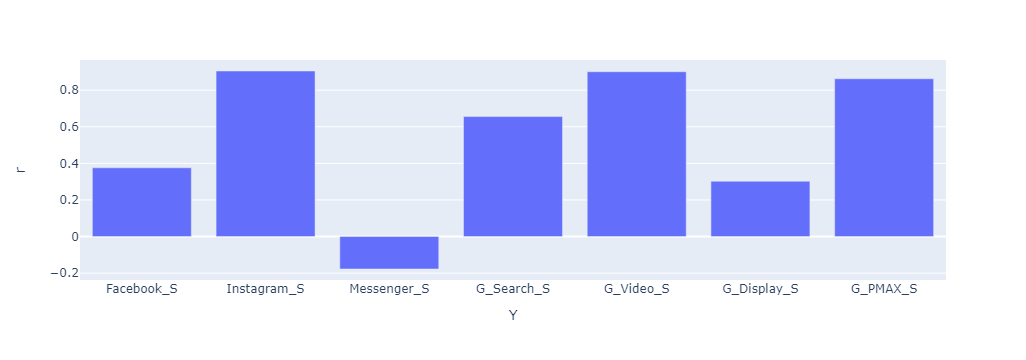

In [142]:
px.bar(cor_df,x="Y",y="r")

In [5]:
df.columns

Index(['DATE', 'revenue', 'Facebook_I', 'Facebook_C', 'Facebook_S',
       'Instagram_I', 'Instagram_C', 'Instagram_S', 'Messenger_I',
       'Messenger_C', 'Messenger_S', 'G_Search_S', 'G_Search_I', 'G_Search_C',
       'G_Video_S', 'G_Video_I', 'G_Video_Click', 'G_Display_S', 'G_Display_I',
       'G_Display_C', 'G_PMAX_S', 'G_PMAX_I', 'G_PMAX_C', 'Event',
       'Rakip Firma Satışları', 'G_Organic_User'],
      dtype='object')

In [6]:
df_copy = df.copy()

In [21]:
df_copy = df_copy[['DATE', 'revenue', 'Facebook_I', 'Facebook_C', 'Facebook_S',
       'Instagram_I', 'Instagram_C', 'Instagram_S', 'G_Search_S', 'G_Search_I', 'G_Search_C',
       'G_Video_S', 'G_Video_I', 'G_Video_Click', 'G_Display_S', 'G_Display_I',
       'G_Display_C', 'G_PMAX_S', 'G_PMAX_I', 'G_PMAX_C', 'Event']]

In [22]:
df_copy["Facebook_W"] = (0.4 * df_copy["Facebook_I"]) + (0.6 * df_copy["Facebook_C"])
df_copy["Instagram_W"] = (0.5 * df_copy["Instagram_I"]) + (0.5 * df_copy["Instagram_C"])
df_copy["G_Search_W"] = (0.05 * df_copy["G_Search_I"]) + (0.95 * df_copy["G_Search_C"])
df_copy["G_Video_W"] = (0.5 * df_copy["G_Video_I"]) + (0.5 * df_copy["G_Video_Click"])
df_copy["G_Display_W"] = (0.05 * df_copy["G_Display_I"]) + (0.95 * df_copy["G_Display_C"])
df_copy["G_PMAX_W"] = (0.5 * df_copy["G_PMAX_I"]) + (0.5 * df_copy["G_PMAX_C"])

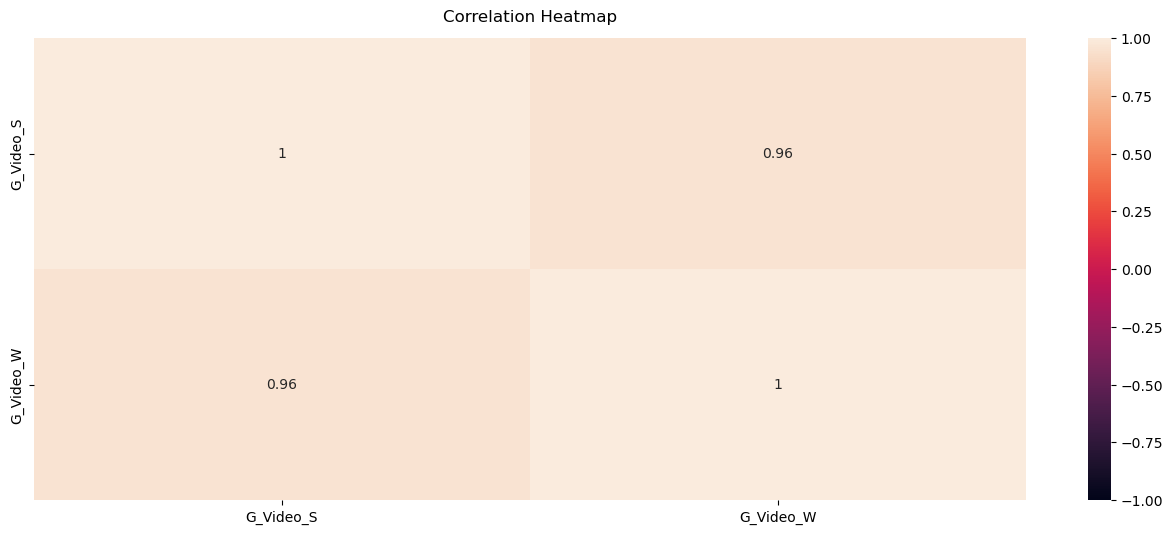

In [23]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_copy[['G_Video_S', 'G_Video_W']].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [24]:
df_copy.columns

Index(['DATE', 'revenue', 'Facebook_I', 'Facebook_C', 'Facebook_S',
       'Instagram_I', 'Instagram_C', 'Instagram_S', 'G_Search_S', 'G_Search_I',
       'G_Search_C', 'G_Video_S', 'G_Video_I', 'G_Video_Click', 'G_Display_S',
       'G_Display_I', 'G_Display_C', 'G_PMAX_S', 'G_PMAX_I', 'G_PMAX_C',
       'Event', 'Facebook_W', 'Instagram_W', 'G_Search_W', 'G_Video_W',
       'G_Display_W', 'G_PMAX_W'],
      dtype='object')

In [25]:
df_copy = df_copy[['DATE', 'revenue', 'Facebook_W','Facebook_S',
                   'Instagram_W', 'Instagram_S', 'G_Search_W', 'G_Search_S',
                   'G_Video_W', 'G_Video_S', 'G_Display_W', 'G_Display_S', 
                   'G_PMAX_W', 'G_PMAX_S','Event']]

In [26]:
df_copy.head()

,DATE,revenue,Facebook_W,Facebook_S,Instagram_W,Instagram_S,G_Search_W,G_Search_S,G_Video_W,G_Video_S,G_Display_W,G_Display_S,G_PMAX_W,G_PMAX_S,Event
0,2021-07-18,48908,56685.4,3337,2766.0,3832,2840.40,2899,146412.5,3422,35796.80,1736,15033.0,196,0
1,2021-07-25,152142,81257.2,5805,5955.5,7833,1221.45,865,76383.0,1577,27681.50,1266,16773.5,201,0
2,2021-08-01,216257,133007.8,8285,8826.0,11200,4198.55,3168,155499.0,3566,40491.55,1822,30006.5,476,0
3,2021-08-08,257988,134610.0,8702,10382.0,14459,8590.80,11376,206316.5,5388,40512.50,3397,108759.0,893,0
4,2021-08-15,286495,112814.0,9196,10843.5,16113,7348.05,4616,249600.5,7364,39643.85,3068,66695.0,969,0


In [27]:
df_copy.to_csv("mmm-data.csv")